<center><h1> <font color="blue">cars-price-prediction</font></h1></center>

### 1. Importation des bibliothèques

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 2. Lecture des données

In [2]:
data = pd.read_csv("car_price_prediction.csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
#Afficher les statistiques descriptives du jet de données
print("Statistiques descriptives :\n")
data.describe()

Statistiques descriptives :



,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [4]:
data.isna ().sum ()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [5]:
#Afficher la distribution de la variable cible "quality"
print("Distribution de la variable cible :\n")
print(data['Price'].value_counts())

Distribution de la variable cible :

15681    280
470      274
14113    244
392      242
314      235
        ... 
42601      1
149        1
54349      1
54954      1
22075      1
Name: Price, Length: 2315, dtype: int64


In [6]:
# Suppression des colonnes inutiles
data = data.drop(['ID', 'Levy', 'Color'], axis=1)

In [7]:
# Conversion des variables catégorielles en variables numériques
# data = pd.get_dummies(data)

label_encoder = LabelEncoder()
data['Manufacturer'] = label_encoder.fit_transform(data['Manufacturer'])
data['Model'] = label_encoder.fit_transform(data['Model'])
data['Category'] = label_encoder.fit_transform(data['Category'])
data['Leather interior'] = label_encoder.fit_transform(data['Leather interior'])
data['Fuel type'] = label_encoder.fit_transform(data['Fuel type'])
data['Gear box type'] = label_encoder.fit_transform(data['Gear box type'])
data['Drive wheels'] = label_encoder.fit_transform(data['Drive wheels'])
data['Doors'] = label_encoder.fit_transform(data['Doors'])
data['Wheel'] = label_encoder.fit_transform(data['Wheel'])
data.head ()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
0,13328,32,1242,2010,4,1,2,3.5,186005 km,6.0,0,0,1,0,12
1,16621,8,658,2011,4,0,5,3,192000 km,6.0,2,0,1,0,8
2,8467,21,684,2006,3,0,5,1.3,200000 km,4.0,3,1,1,1,2
3,3607,16,661,2011,4,1,2,2.5,168966 km,4.0,0,0,1,0,0
4,11726,21,684,2014,3,1,5,1.3,91901 km,4.0,0,1,1,0,4


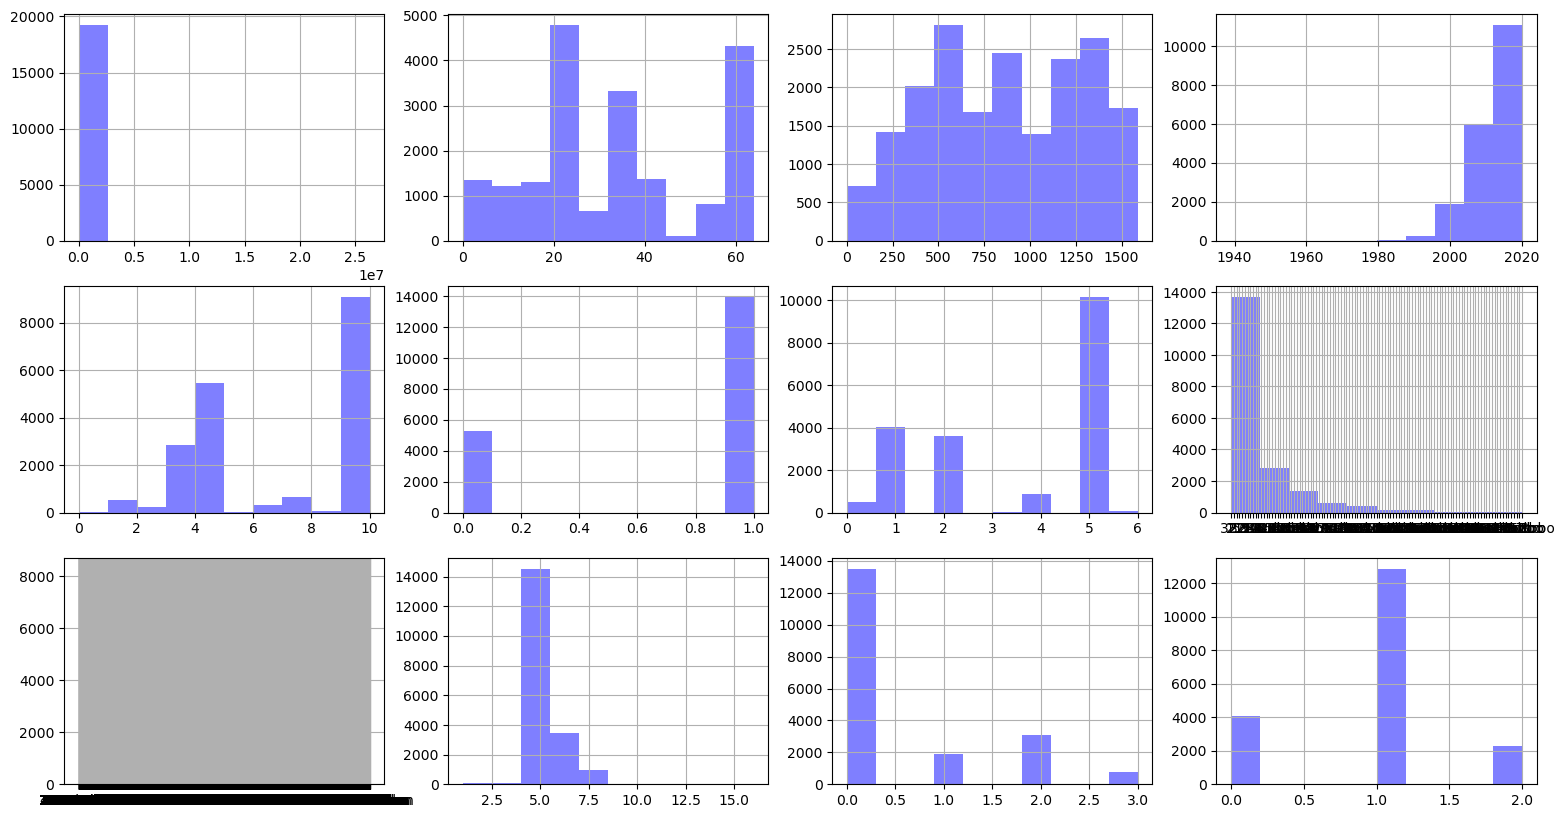

In [8]:
#Tracer les histogrammes des variables

# Créer un nouvelle figure de dimensions 3x4 avec subplot
fig, axes = plt.subplots(figsize=(19, 10),nrows=3, ncols=4)

for ax, column in zip(axes.flatten(), data.columns):
    # Faire le histogramme de chacune des figure
    data[column].hist(ax=ax, alpha=0.5, label='x', color='blue')

plt.show()

In [9]:
#Calculer la matrice de corrélation entre les variables
correlation_matrix = data.corr()
correlation_matrix

/tmp/ipykernel_12067/3130361157.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
Price,1.000000,-0.003886,0.000773,0.012982,-0.019721,0.000754,-0.012419,0.007518,0.016340,-0.003419,-0.030869,-0.014649,-0.012824
Manufacturer,-0.003886,1.000000,-0.019788,-0.050922,-0.038340,-0.174997,-0.086630,-0.089523,0.055909,-0.065689,0.047570,0.089016,0.180210
Model,0.000773,-0.019788,1.000000,0.062975,-0.165528,-0.001230,-0.166124,-0.005475,-0.056702,-0.186701,0.072332,-0.033578,-0.102173
Prod. year,0.012982,-0.050922,0.062975,1.000000,0.071538,0.390066,0.058961,-0.096797,-0.217766,-0.125912,0.176701,-0.227172,0.236969
Category,-0.019721,-0.038340,-0.165528,0.071538,1.000000,0.091701,0.112440,-0.066238,-0.011968,0.213743,0.220697,-0.120444,0.131772
Leather interior,0.000754,-0.174997,-0.001230,0.390066,0.091701,1.000000,-0.029814,0.202473,-0.288992,-0.090536,0.093915,-0.348970,0.165023
Fuel type,-0.012419,-0.086630,-0.166124,0.058961,0.112440,-0.029814,1.000000,0.081037,0.098677,-0.044218,-0.046363,0.080883,0.081676
Cylinders,0.007518,-0.089523,-0.005475,-0.096797,-0.066238,0.202473,0.081037,1.000000,0.058432,-0.208963,-0.028235,-0.093550,0.176868
Gear box type,0.016340,0.055909,-0.056702,-0.217766,-0.011968,-0.288992,0.098677,0.058432,1.000000,0.088333,-0.074669,0.137358,0.107086
Drive wheels,-0.003419,-0.065689,-0.186701,-0.125912,0.213743,-0.090536,-0.044218,-0.208963,0.088333,1.000000,-0.137208,-0.009184,-0.023810


In [10]:
# Correction du format de la colonne 'Engine volume'
data['Engine volume'] = data['Engine volume'].apply(lambda x: float(str(x).split()[0]))

# Correction du format de la colonne 'Mileage'
data['Mileage'] = data['Mileage'].apply(lambda x: float(str(x).split()[0]))

In [11]:
# Gestion des valeurs manquantes
# data = data.fillna(data.mean())

data = data.dropna()  # Suppression des lignes avec des valeurs manquantes

In [12]:
# Normalisation des données
data = (data - data.min()) / (data.max() - data.min())

In [13]:
# Séparation des données en ensembles d'entraînement et de test
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

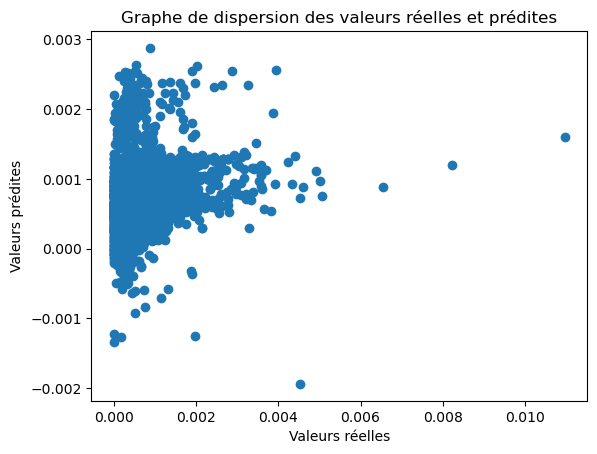

In [16]:
#Afficher le graphe de dispersion des valeurs prédites et réelles
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Graphe de dispersion des valeurs réelles et prédites")
plt.show()

In [17]:
mae = mean_absolute_error(y_test, y_pred,)
print ("Mean Absolute_error (MAE)", mae)

Mean Absolute_error (MAE) 0.00047521091167221336


In [18]:
#Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)

#Calculer le coefficient de détermination (R2)
r2 = r2_score(y_test, y_pred)

#Afficher les métriques de performance
print("Erreur quadratique moyenne (MSE) :", mse)
print("Coefficient de détermination (R2) :", r2)

Erreur quadratique moyenne (MSE) : 4.868664395841705e-07
Coefficient de détermination (R2) : -0.0813747720585638


In [19]:
# Évaluation du modèle en utilisant l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt (mse)
print("RMSE:", rmse)

RMSE: 0.0006977581526461518
